In [24]:
import numpy as np
import pandas as pd
import itertools
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
b = 10
def create(n, m, c, t):
    vals = {"sa": [], "ga": []}
    for alg in vals:
        for i in itertools.count():
            try:
                df = pd.read_csv("src/out/{}_n{}_m{}_c{}_{}_{}.csv".format(alg, n, m, c, t, i))
            except FileNotFoundError as e:
                break
            vals[alg].append((df['time'].values, df['score'].values))
    xmax = max([time[-1] for time, _ in vals["sa"] + vals["ga"]])
    x = np.logspace(start=1, stop=math.log(xmax, b), num=100, base=b)
    y = {"sa": [], "ga": []}
    for alg in vals:
        for time, score in vals[alg]:
            y[alg].append([np.interp(xi, time, score) for xi in x])
        y[alg] = np.average(y[alg], axis=0)
    return x, y["sa"], y["ga"]

def plot(n, m, c, t):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xscale('log', basex=b)
    
    t_map = {
    "u": "Uniform graph with {} nodes".format(n),
    "c": "Clustered graph with {} nodes, {} clusters".format(n, c),
    "m": "Mixed graph with {} nodes, {} clusters".format(n, c)
    }
    x, y_sa, y_ga = create(n, m, c, t)
    plt.plot(x, y_sa, label="SA")
    plt.plot(x, y_ga, label="GA")
    
    # Plot optimal (bruteforce) if it exists
    try:
        df = pd.read_csv("src/out/brute_n{}_m{}_c{}_{}.csv".format(n, m, c, t))
        score = df['score'].values[0]
        plt.axhline(y=score, color='r', linestyle='--', label="Optimal")
    except FileNotFoundError as e: pass

    plt.xlim(x[0], x[-1])
    plt.legend()
    plt.title("{}, {} vehicles".format(t_map[t], m))
    plt.xlabel("Time (μs)")
    plt.ylabel("Average score");
    fig.savefig("img/n{}_m{}_c{}_{}.png".format(n, m, c, t), dpi=300)

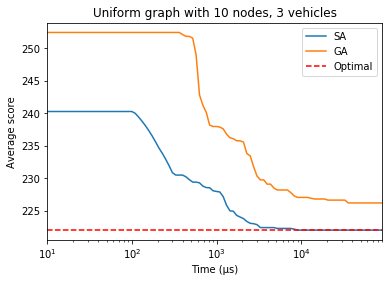

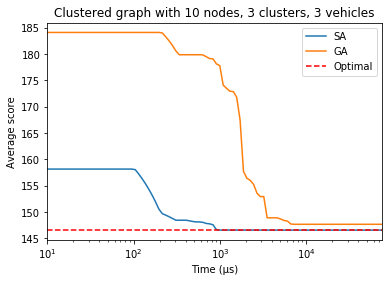

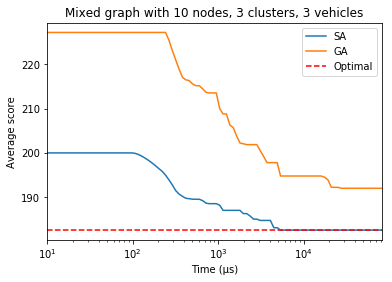

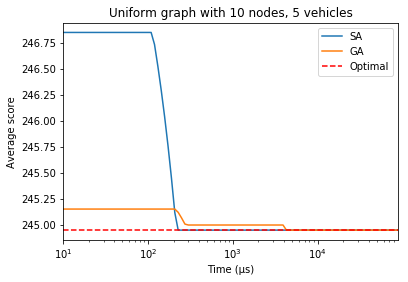

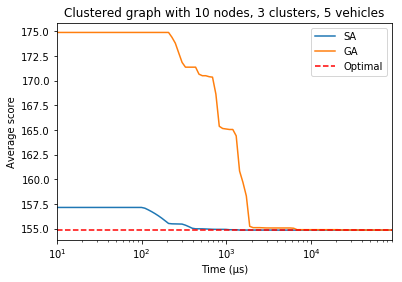

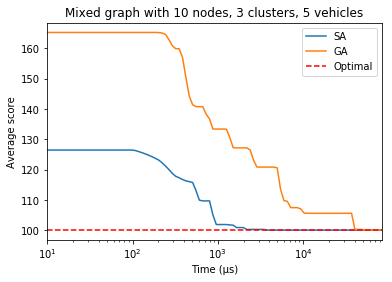

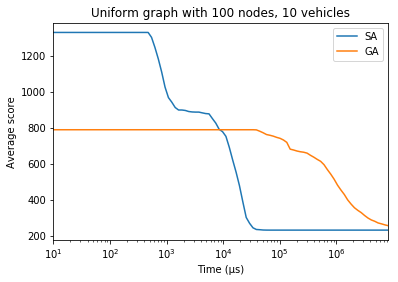

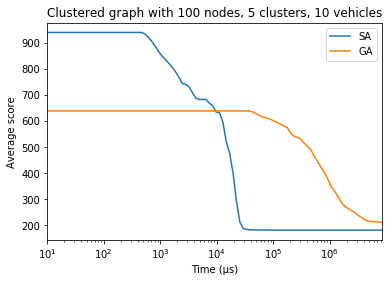

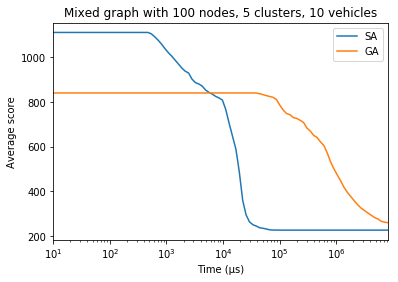

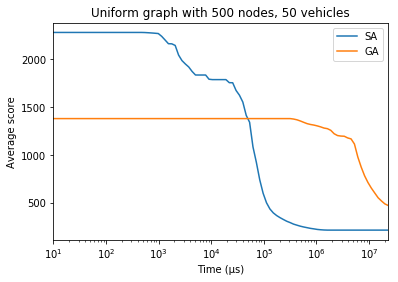

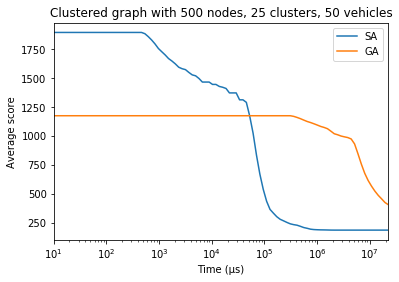

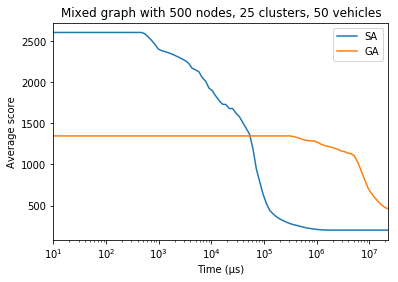

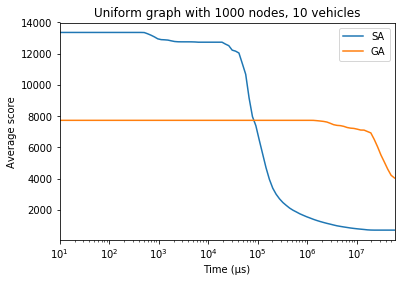

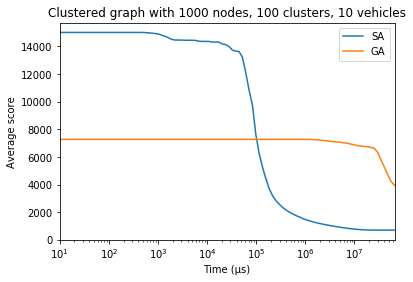

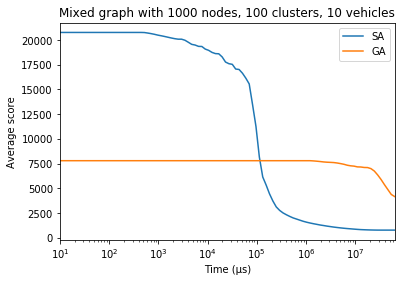

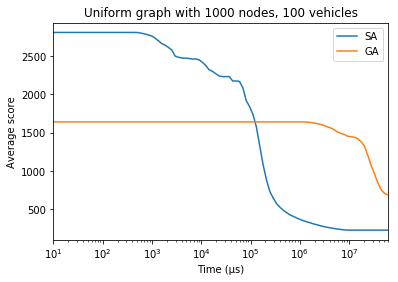

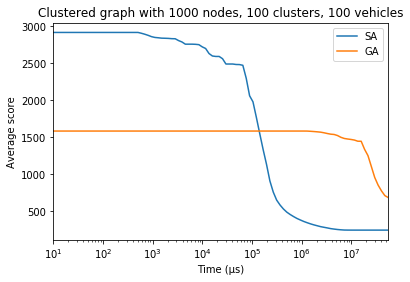

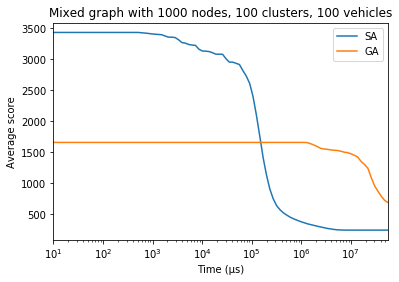

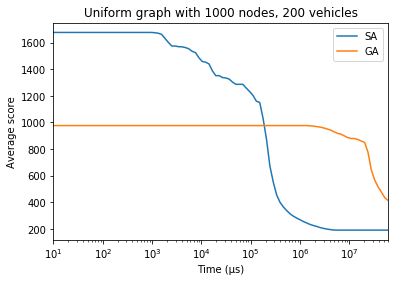

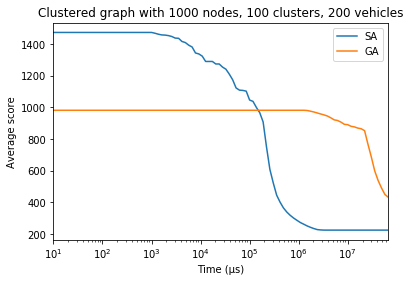

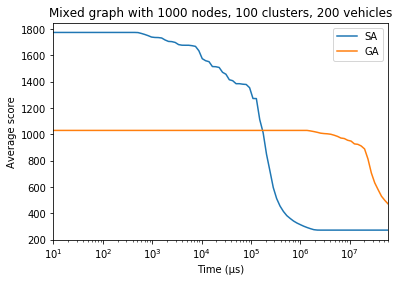

In [33]:
cases = [
    (10, 3, 3),
    #(10, 5, 3),
    (100, 10, 5),
    (500, 50, 25),
    (1000, 10, 100),
    (1000, 100, 100),
    (1000, 200, 100)
]

for case in cases:
    for t in ["u", "c", "m"]:
        plot(*case, t)